## GRADUATE ADMISSIONS

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

In [1]:
!ls -lha ../input/

total 40K
drwxr-xr-x 2 nobody nogroup 4.0K Jan  9  2020 .
drwxr-xr-x 5 root   root    4.0K Oct  8 07:33 ..
-rw-r--r-- 1 nobody nogroup  13K Jan  9  2020 Admission_Predict.csv
-rw-r--r-- 1 nobody nogroup  16K Jan  9  2020 Admission_Predict_Ver1.1.csv


### Load the dataset and do some exploratory analysis

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')
df.head() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [4]:
#to get the total number of rolls and columns in the dataset
df.shape

(500, 9)

In [5]:
#lets get a feel of the dataset
df.sample(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
428,429,316,103,2,2.0,4.5,8.74,0,0.69
373,374,321,109,3,3.0,3.0,8.54,1,0.79
196,197,306,105,2,3.0,2.5,8.26,0,0.73
436,437,310,110,1,1.5,4.0,7.23,1,0.58
240,241,296,101,1,2.5,3.0,7.68,0,0.60
467,468,318,101,5,3.5,5.0,8.78,1,0.78
299,300,305,112,3,3.0,3.5,8.65,0,0.71
127,128,319,112,3,2.5,2.0,8.71,1,0.78
453,454,319,103,3,2.5,4.0,8.76,1,0.73
18,19,318,110,3,4.0,3.0,8.80,0,0.63


In [6]:
#drop irrelevant columns 
df = df.drop(['Serial No.'], axis=1)

In [7]:
#check for missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#what are the featues in the dataset
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
#insight to the data type and numerical values of the features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [10]:
#show each feature and the number of unique elements each contains
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [11]:
#check the overall analytical attributes of the dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
import numpy as np
#finding the average value of each features 
# sop - statement of purpose
# lor - letter of recommendation
gre = df['GRE Score'].mean()
toefl = df['TOEFL Score'].mean()
cgpa = df['CGPA'].mean()
sop = np.round(df['SOP'].mean())
lor = np.round(df['LOR '].mean())
research = np.round(df['Research'].mean())
uni_rating = np.round(df['University Rating'].mean())

# printing the results
print("The Average Score for GRE is {:.2f}".format(gre))
print("The Average Score for TOEFL is {:.2f}".format(toefl))
print("The Average CGPA is {:.2f}".format(cgpa))
print("The Average Number for Statement of Purpose is", sop)
print("The Average Number for Recommendation letters among the students is", lor)
print("The Average Number of Research done by students is ", research)
print("The Average University Ratings of Different Students is ", uni_rating)


The Average Score for GRE is 316.47
The Average Score for TOEFL is 107.19
The Average CGPA is 8.58
The Average Number for Statement of Purpose is 3.0
The Average Number for Recommendation letters among the students is 3.0
The Average Number of Research done by students is  1.0
The Average University Ratings of Different Students is  3.0


In [13]:
#finding the minimum value of each features 

gre = df['GRE Score'].min()
toefl = df['TOEFL Score'].min()
cgpa = df['CGPA'].min()
sop = np.round(df['SOP'].min())
lor = np.round(df['LOR '].min())
research = np.round(df['Research'].min())
uni_rating = np.round(df['University Rating'].min())

# printing the results
print("The Minimum Score for GRE is {:.2f}".format(gre))
print("The Minimum Score for TOEFL is {:.2f}".format(toefl))
print("The Minimum CGPA is {:.2f}".format(cgpa))
print("The Minimum Number for Statement of Purpose is", sop)
print("The Minimum Number for Recommendation letters among the students is", lor)
print("The Minimum Number of Research done by students is ", research)
print("The Minimum University Ratings of Different Students is ", uni_rating)

The Minimum Score for GRE is 290.00
The Minimum Score for TOEFL is 92.00
The Minimum CGPA is 6.80
The Minimum Number for Statement of Purpose is 1.0
The Minimum Number for Recommendation letters among the students is 1.0
The Minimum Number of Research done by students is  0
The Minimum University Ratings of Different Students is  1


In [14]:
#finding the maximum value of each features 

gre = df['GRE Score'].max()
toefl = df['TOEFL Score'].max()
cgpa = df['CGPA'].max()
sop = np.round(df['SOP'].max())
lor = np.round(df['LOR '].max())
research = np.round(df['Research'].max())
uni_rating = np.round(df['University Rating'].max())

# printing the results
print("The Maximum Score for GRE is {:.2f}".format(gre))
print("The Maximum Score for TOEFL is {:.2f}".format(toefl))
print("The Maximum CGPA is {:.2f}".format(cgpa))
print("The Maximum Number for Statement of Purpose is", sop)
print("The Maximum Number for Recommendation letters among the students is", lor)
print("The Maximum Number of Research done by students is ", research)
print("The Maximum University Ratings of Different Students is ", uni_rating)

The Maximum Score for GRE is 340.00
The Maximum Score for TOEFL is 120.00
The Maximum CGPA is 9.92
The Maximum Number for Statement of Purpose is 5.0
The Maximum Number for Recommendation letters among the students is 5.0
The Maximum Number of Research done by students is  1
The Maximum University Ratings of Different Students is  5


### Data Visualizations

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10,7))
plt.style.use('_classic_test')

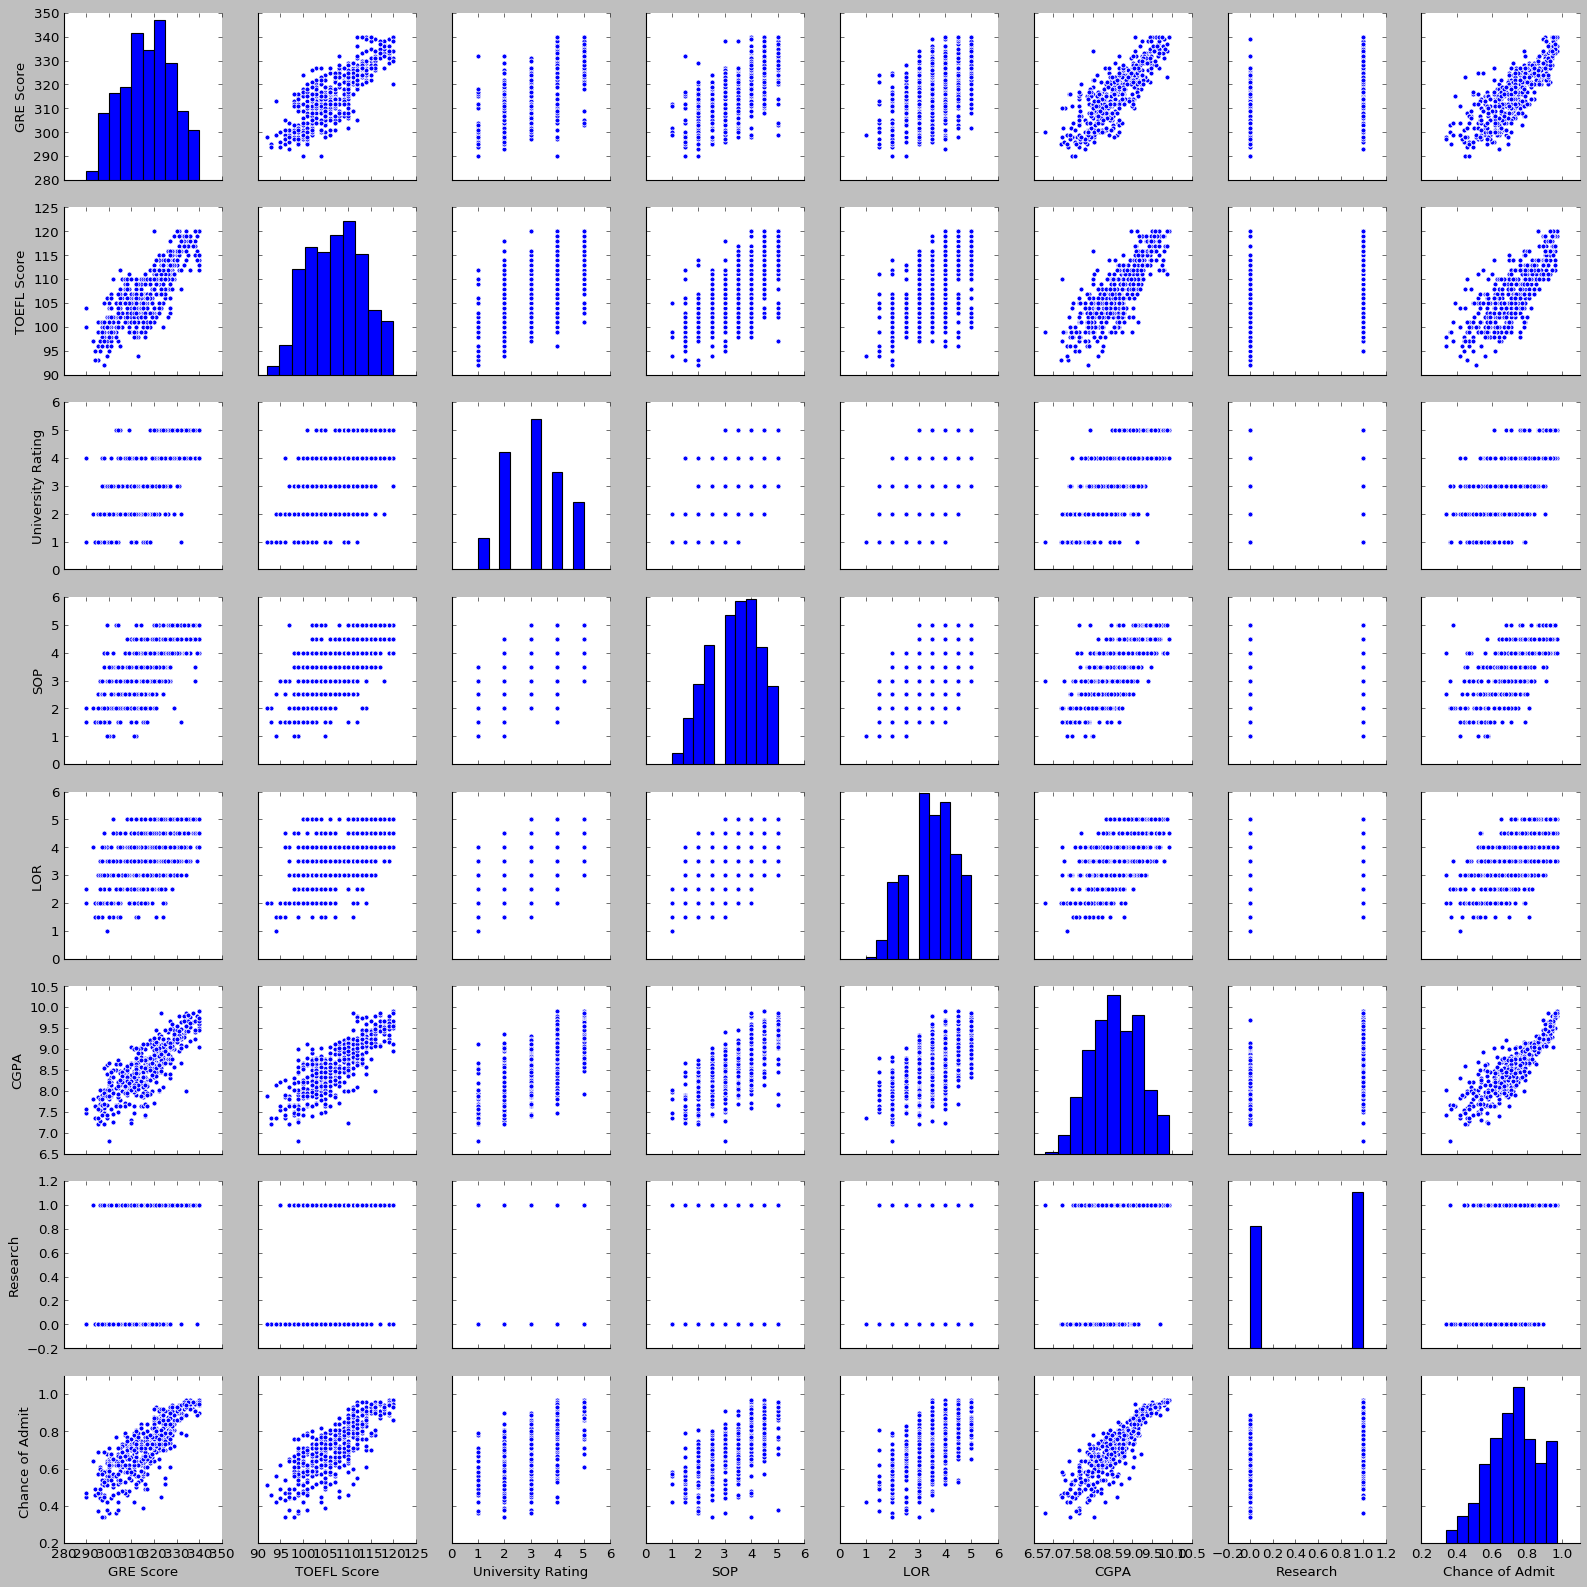

In [16]:
#this plots a scatterplot between each numerical feature in the dataset giving an overall summary.
sns.pairplot(df)
plt.show()

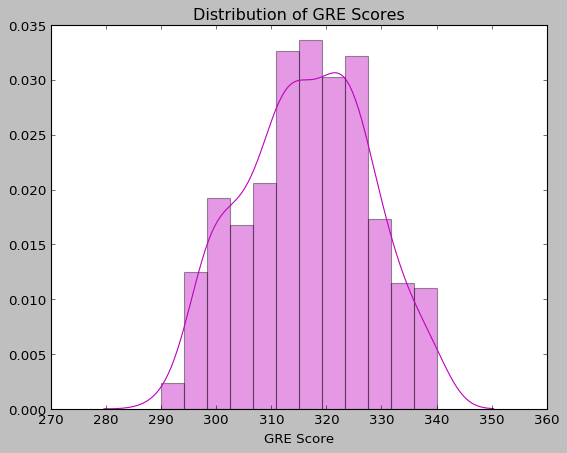

In [17]:
#lets see the distribution of the variables of graduate applicants.

fig = sns.distplot(df['GRE Score'], color='m')
plt.title("Distribution of GRE Scores")
plt.show()

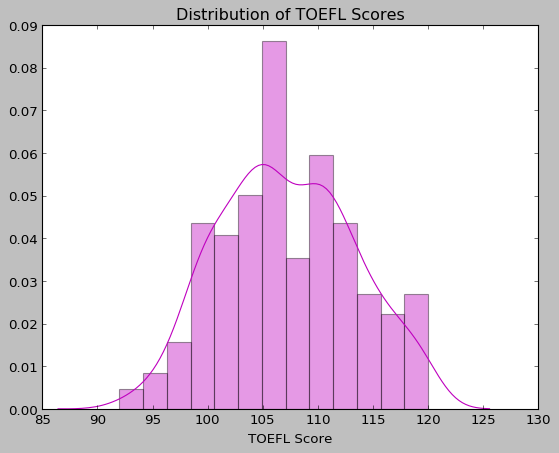

In [18]:
fig = sns.distplot(df['TOEFL Score'], color='m')
plt.title("Distribution of TOEFL Scores")
plt.show()

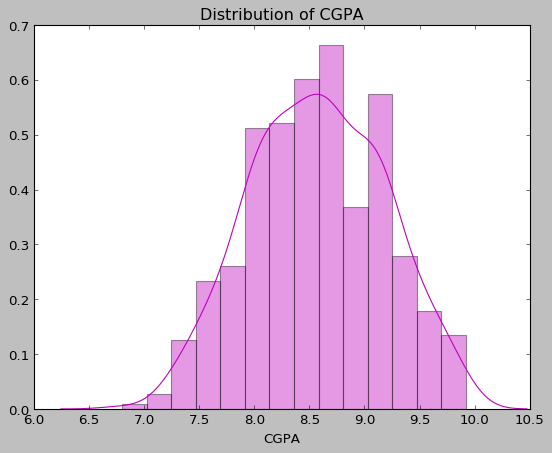

In [19]:
fig = sns.distplot(df['CGPA'], color='m')
plt.title("Distribution of CGPA")
plt.show()

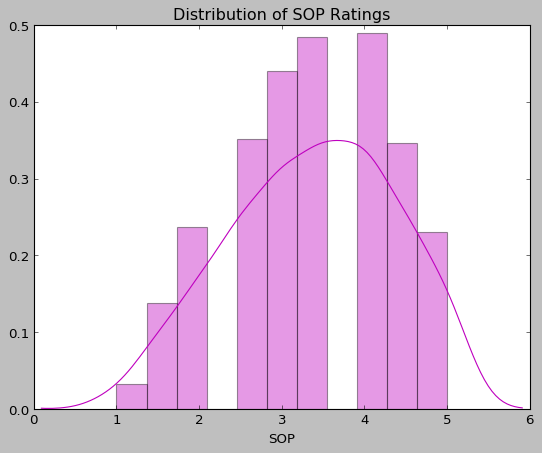

In [20]:
fig = sns.distplot(df['SOP'], color='m')
plt.title("Distribution of SOP Ratings")
plt.show()

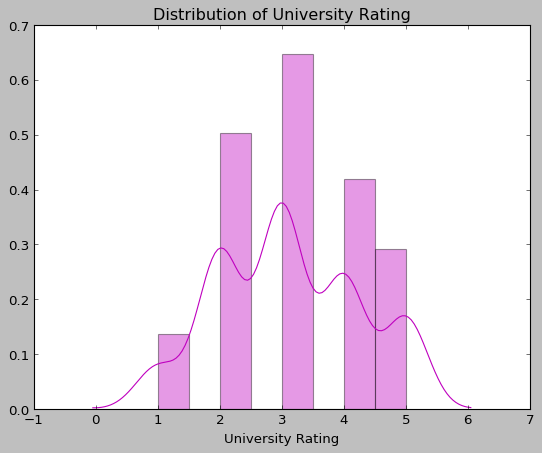

In [21]:
fig = sns.distplot(df['University Rating'], color= 'm')
plt.title("Distribution of University Rating")
plt.show()


It is clear from the distributions, students with varied merit apply for the university.



**Understanding the relation between different factors responsible for graduate admissions**

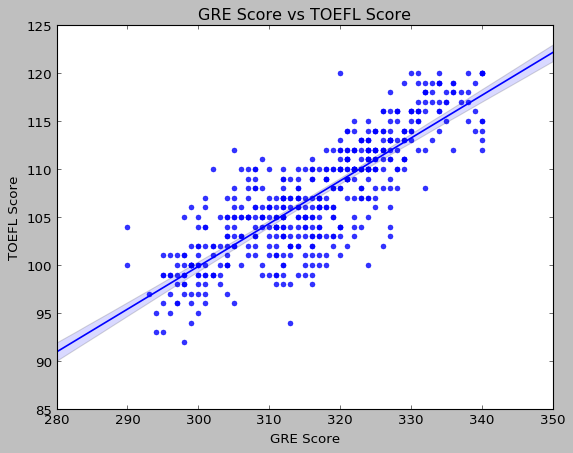

In [22]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

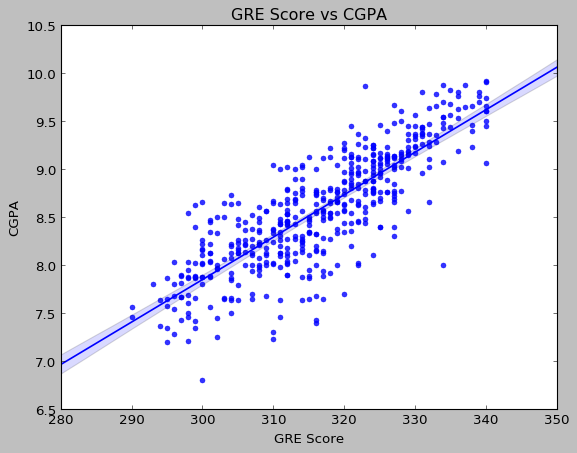

In [23]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

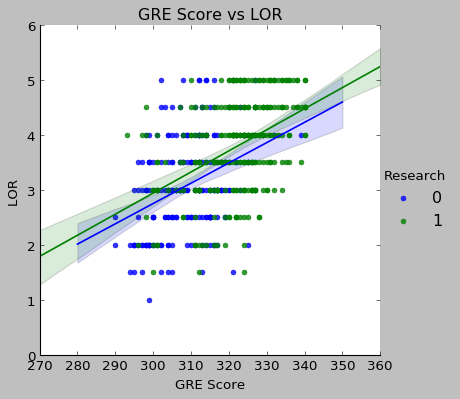

In [24]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

 GRE scores and LORs are also not related. People with different kinds of LORs have all kinds of GRE scores

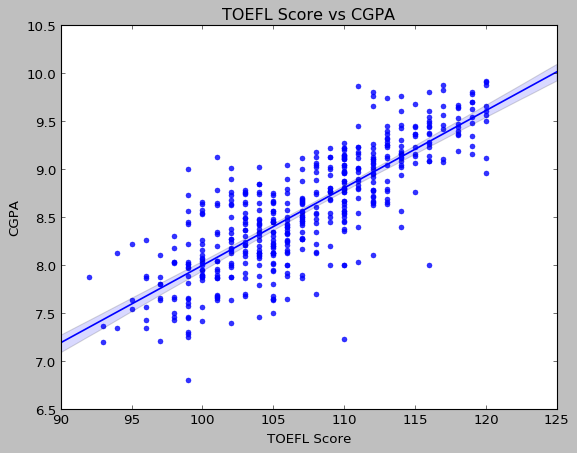

In [25]:
fig = sns.regplot(x="TOEFL Score", y="CGPA", data=df)
plt.title("TOEFL Score vs CGPA")
plt.show()

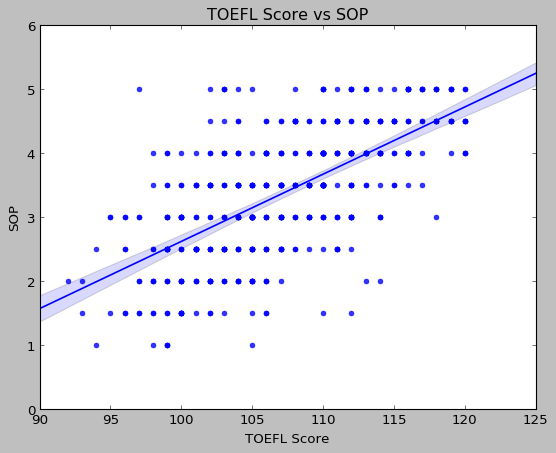

In [26]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

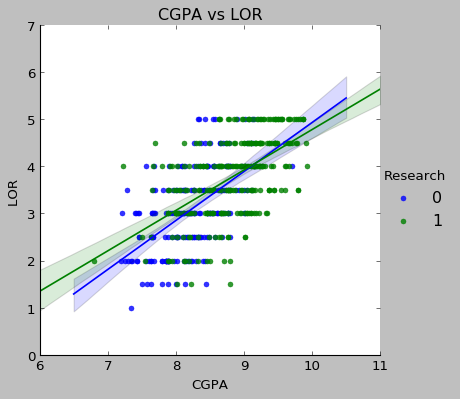

In [27]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

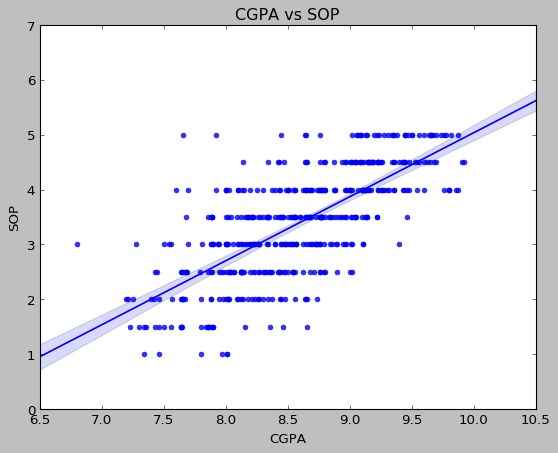

In [28]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP are slightly related because Statement of Purpose is related to academic performance. People with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

**Correlation among variables**

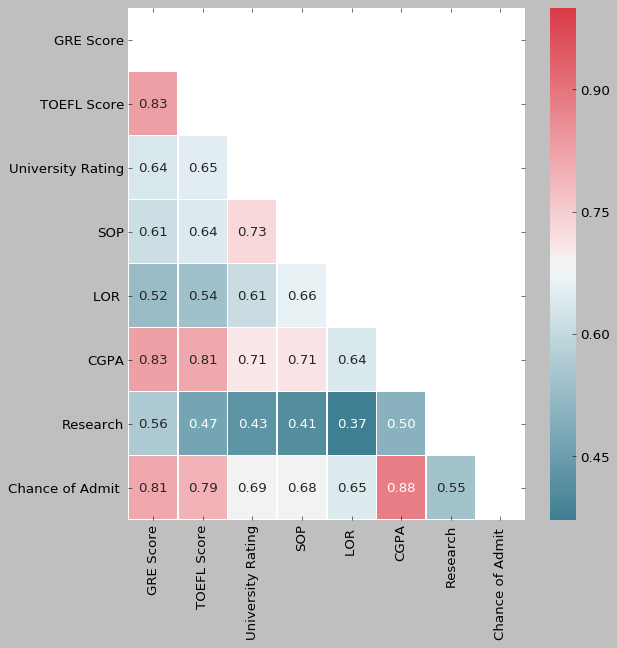

In [29]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask= mask)
plt.show()

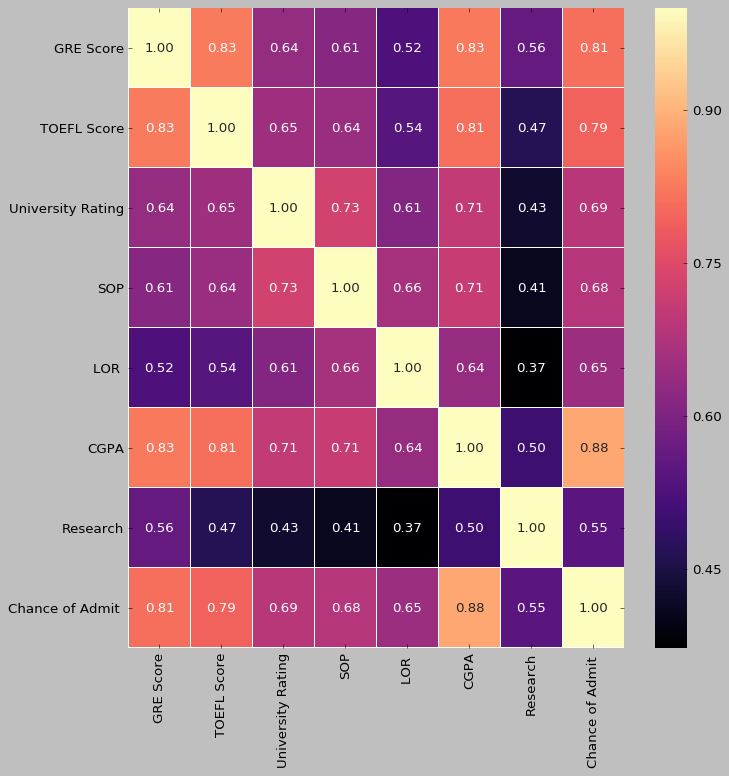

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

## Summary of the Correlation analysis
* There is a Strong Positive Corelation of 81 % of GRE score with Chance of Admission. This means Chance of admission is increasing with increase in GRE Score.   
* There is a Strong Positive Corelation of 79 % of TOEFL score with Chance of Admission. This means Chance of admission is increasing with increase in TOEFL Score. 
* There is a Strong Positive Corelation of 69 % of University Rating with Chance of Admission. This means Chance of admission is increasing with increase in University rating.
* There is a Strong Positive Corelation of 88 % of CGPA with Chance of Admission. This means Chance of admission is increasing with increase in CGPA.
* There is a Strong Positive Corelation of 68 % of SOP with Chance of Admission. This means Chance of admission is increasing with increase in SOP. 
* There is a Strong Positive Corelation of 65 % of LOR with Chance of Admission. This means Chance of admission is increasing with increase in LOR. 


## Data Preprocessing


In [31]:
#splitting the data into dependent and independent datasets

x = df.iloc[:400, :-1]
y = df.iloc[:400, -1]
val = df.iloc[400:, :]
x_val = df.iloc[400:, :-1]
y_val = df.iloc[400:, -1]

# getting the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)
print("Shape of val: ", val.shape)

Shape of x:  (400, 7)
Shape of y:  (400,)
Shape of val:  (100, 8)


In [32]:
#import necessary modules
from sklearn.model_selection import train_test_split 

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =0)

In [33]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of x_val: ", x_val.shape)
print("Shape of y_val: ", y_val.shape)

Shape of x_train:  (280, 7)
Shape of x_test:  (120, 7)
Shape of y_train:  (280,)
Shape of y_test:  (120,)
Shape of x_val:  (100, 7)
Shape of y_val:  (100,)


In [34]:
# standard Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


###  Modelling

In [78]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from xgboost.sklearn import XGBRegressor, XGBClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import r2_score,mean_squared_error


### Regressions

In [79]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['XGB Regression:', XGBRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
val_reg_pred=[]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(x_train,y_train)
    val_preds = model.predict(x_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    val_reg_pred.append(val_rmse)
    reg_predictions = model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test, reg_predictions))
    reg_pred.append(rmse)
    print(name,'validation rmse is {}, test rmse is {}'.format(val_rmse, rmse))

Results...

Linear Regression : validation rmse is 0.04299931711898975, test rmse is 0.06616054307049324
Decision Tree Regression : validation rmse is 0.08099382692526634, test rmse is 0.10883090859983971
Random Forest Regression : validation rmse is 0.05198894113174455, test rmse is 0.07785237097652625
Gradient Boosting Regression : validation rmse is 0.049158921270969984, test rmse is 0.07599789911250542
XGB Regression: validation rmse is 0.045381945119602446, test rmse is 0.07341675109573247
Ada Boosting Regression : validation rmse is 0.05497770661301163, test rmse is 0.07524718355065059
Extra Tree Regression : validation rmse is 0.05411866591112532, test rmse is 0.07731380859846447
K-Neighbors Regression : validation rmse is 0.059615098758619874, test rmse is 0.06972660898107694
Support Vector Regression : validation rmse is 0.0629999199537385, test rmse is 0.08153693572571248


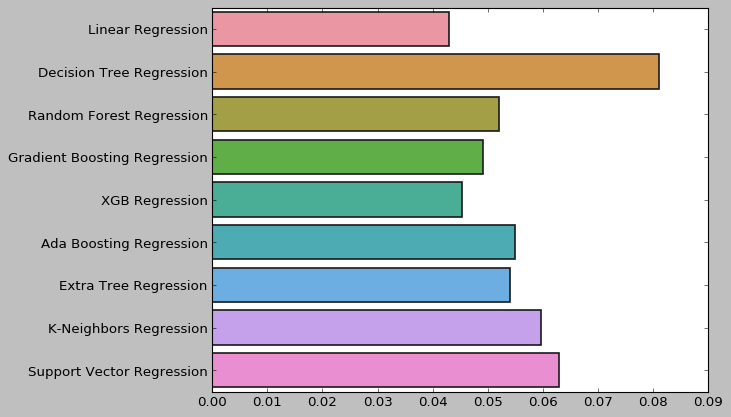

In [80]:
#ploting a barchart to show the regression with the lowest rmse in th validation set 
y_axis=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression',
      'Gradient Boosting Regression', 'XGB Regression','Ada Boosting Regression','Extra Tree Regression' ,
      'K-Neighbors Regression', 'Support Vector Regression' ]
x_axis=val_reg_pred
sns.barplot(x=x_axis,y=y_axis,linewidth=1.5,edgecolor="0.1")

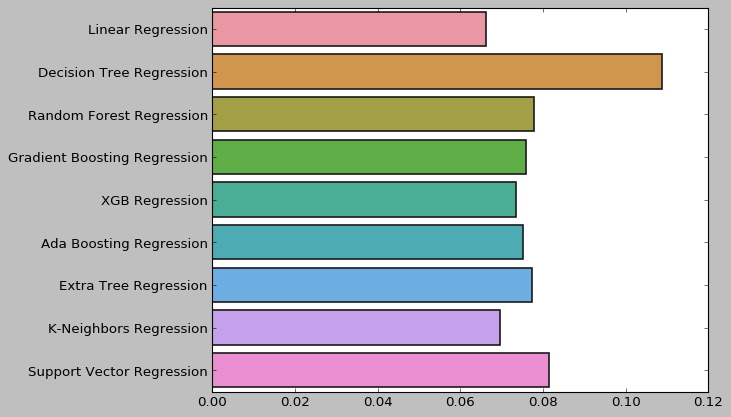

In [81]:
#ploting a barchart to show the regression with the lowest rmse in the test set 
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression',
      'Gradient Boosting Regression', 'XGB Regression','Ada Boosting Regression','Extra Tree Regression' ,
      'K-Neighbors Regression', 'Support Vector Regression' ]
x_ax=reg_pred
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1") 

From the barplot, it can be seen that linear regression has the best root mean squared error both in the validation set and test set

### Classifications

In [39]:
#If Chance of Admit greater than 80% we classify it as 1
y_train_c = [1 if each > 0.8 else 0 for each in y_train]
y_test_c  = [1 if each > 0.8 else 0 for each in y_test]
y_val_c = [1 if each > 0.8 else 0 for each in y_val]

In [82]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['XGB Classification:', XGBClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]
val_cla_pred=[]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(x_train,y_train_c)
    val_pred = model.predict(x_val)
    val_rms=np.sqrt(mean_squared_error(y_val_c, val_pred))
    val_cla_pred.append(val_rms)
    predictions = model.predict(x_test)
    rms=np.sqrt(mean_squared_error(y_test_c, predictions))
    cla_pred.append(rms)
    print(name,'Validation rmse {}, Test rmse {}'.format(val_rms, rms))

Logistic Regression : Validation rmse 0.2449489742783178, Test rmse 0.27386127875258304
Decision Tree Classification : Validation rmse 0.2449489742783178, Test rmse 0.32914029430219166
Random Forest Classification : Validation rmse 0.2, Test rmse 0.2581988897471611
Gradient Boosting Classification : Validation rmse 0.282842712474619, Test rmse 0.24152294576982397
XGB Classification: Validation rmse 0.22360679774997896, Test rmse 0.27386127875258304
Ada Boosting Classification : Validation rmse 0.31622776601683794, Test rmse 0.30276503540974914
Extra Tree Classification : Validation rmse 0.2, Test rmse 0.2581988897471611
K-Neighbors Classification : Validation rmse 0.22360679774997896, Test rmse 0.31622776601683794
Support Vector Classification : Validation rmse 0.22360679774997896, Test rmse 0.28867513459481287
Gausian Naive Bayes : Validation rmse 0.2645751311064591, Test rmse 0.2581988897471611


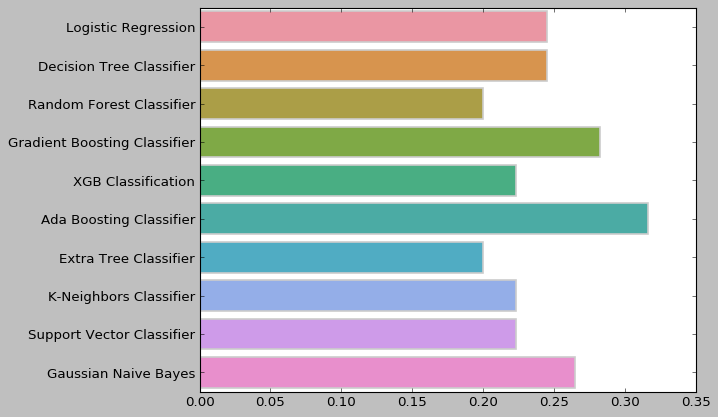

In [84]:
y_axis=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'XGB Classification',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
       'Gaussian Naive Bayes']
x_axis= val_cla_pred
sns.barplot(x=x_axis,y=y_axis,linewidth=1.5,edgecolor="0.8")

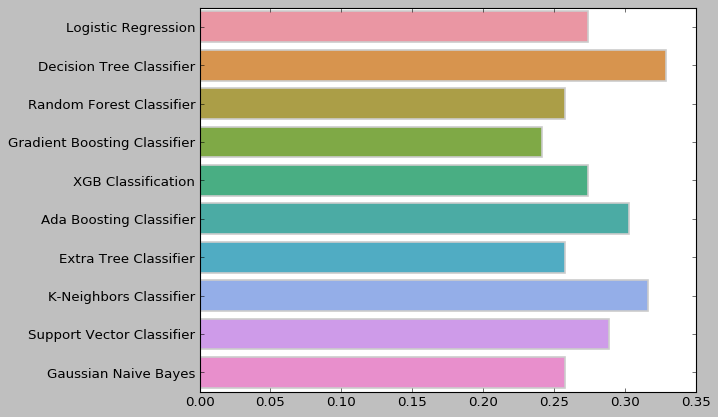

In [86]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'XGB Classification',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
       'Gaussian Naive Bayes']
x_ax=cla_pred
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.8")

In [87]:
# stacked predictions

stacked_predictions = val_preds.reshape(-1,1)

# specifying the meta model
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_val)

# final predictions
stacked_predictions = (meta_model.predict(stacked_predictions))

mse = mean_squared_error(y_val, stacked_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, stacked_predictions)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.05979877870926319
R-Squared Error: 0.8026691262872591


In [88]:
# stacked predictions

stacked_predictions = reg_predictions.reshape(-1,1)

# specifying the meta model
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test)

# final predictions
stacked_predictions = (meta_model.predict(stacked_predictions))

mse = mean_squared_error(y_test, stacked_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, stacked_predictions)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.07663494031811467
R-Squared Error: 0.6587552784941553


Using Ridge regression to improve the performance of the linear regression model

In [65]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
ridge_reg= Ridge()
parameter = {'alpha': np.logspace(-10,3,100)}
ridge_reg = GridSearchCV(ridge_reg, parameter, scoring='r2')
ridge_reg.fit(x_train,y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-10, 1.35305e-10, ..., 7.39072e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [66]:
#check for the best parameters
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1.74752840000769}
0.8101241360392665


In [70]:
ridge_reg_imp=Ridge(alpha=1.7475)
ridge_reg_imp.fit(x_train, y_train)
ridge_pred=ridge_reg_imp.predict(x_val)

In [71]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y_val, ridge_pred))))
print('R2 score:   {}'.format(r2_score(y_val, ridge_pred)))


RMSE score: 0.04279385126881262
R2 score:   0.898941428273273


In [115]:
ridge_reg_imp=Ridge(alpha=1.7475)
ridge_reg_imp.fit(x_train, y_train)
ridge_pred=ridge_reg_imp.predict(x_val)

In [116]:
print('Val RMSE score: {}'.format(np.sqrt(mean_squared_error(y_val, ridge_pred))))
print('Val R2 score:   {}'.format(r2_score(y_val, ridge_pred)))


Val RMSE score: 0.04279385126881262
Val R2 score:   0.898941428273273


In [67]:
ridge_reg_imp=Ridge(alpha=1.7475)
ridge_reg_imp.fit(x_train, y_train)
ridge_pred=ridge_reg_imp.predict(x_test)

In [69]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y_test, ridge_pred))))
print('R2 score:   {}'.format(r2_score(y_test, ridge_pred)))


RMSE score: 0.06601246841831178
R2 score:   0.7467996855552906


Ridge regression slightly improved the model

In [72]:
lasso_reg=Lasso(alpha=0.4)
parameter = {'alpha': np.logspace(-10,3,100)}
lasso_reg = GridSearchCV(lasso_reg, parameter, scoring='r2')
lasso_reg.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-10, 1.35305e-10, ..., 7.39072e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [73]:
#check for the best parameters
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.0012328467394420685}
0.8113734768331282


In [117]:
lasso_reg_imp=Lasso(alpha=0.0012)
lasso_reg_imp.fit(x_train, y_train)
lasso_pred=lasso_reg_imp.predict(x_val)

In [118]:
print('Val RMSE score: {}'.format(np.sqrt(mean_squared_error(y_val, lasso_pred))))
print('Val R2 score:   {}'.format(r2_score(y_val, lasso_pred)))

Val RMSE score: 0.04244574039573426
Val R2 score:   0.9005788832185936


In [120]:
lasso_reg_imp=Lasso(alpha=0.0012)
lasso_reg_imp.fit(x_train, y_train)
lasso_pred=lasso_reg_imp.predict(x_test)

In [121]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y_test, lasso_pred))))
print('R2 score:   {}'.format(r2_score(y_test, lasso_pred)))

RMSE score: 0.06629344104233403
R2 score:   0.7446396766330134


Lasso did not improve the model, rather we could use it for further feature selection

Feature selection

In [124]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
        weights = pd.Series(model.coef_, feat.columns).sort_values(ascending=False)
        weights_df = pd.DataFrame(weights).reset_index()
        weights_df.columns = [ 'x' , col_name]
        weights_df[col_name].round(3)
        return weights_df
ridge_weights_df = get_weights_df(ridge_reg_imp, x, 'Ridge_Weight' )
lasso_weights_df = get_weights_df(lasso_reg_imp, x, 'Lasso_weight' )
final_weights = pd.merge(ridge_weights_df, lasso_weights_df, on= 'x' )
final_weights

,x,Ridge_Weight,Lasso_weight
0,CGPA,0.078436,0.080532
1,GRE Score,0.023043,0.022524
2,LOR,0.018988,0.017156
3,TOEFL Score,0.014701,0.013062
4,Research,0.011235,0.010638
5,University Rating,0.003714,0.001915
6,SOP,-0.002742,0.000000


In [103]:
x_new= x.drop(columns=(['SOP','University Rating']))
x_new.head()

,GRE Score,TOEFL Score,LOR,CGPA,Research
0,337,118,4.5,9.65,1
1,324,107,4.5,8.87,1
2,316,104,3.5,8.00,1
3,322,110,2.5,8.67,1
4,314,103,3.0,8.21,0


In [105]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_new, y, test_size=0.3, random_state=0)

In [128]:
val1=val.drop(columns=(['SOP','University Rating']))
x1_val = val1.iloc[:, :-1]
y1_val = val1.iloc[:, -1]

In [129]:
ridge_reg_imp=Ridge(alpha=1.7475)
ridge_reg_imp.fit(x1_train, y1_train)
ridge_pred=ridge_reg_imp.predict(x1_val)

In [130]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y1_val, ridge_pred))))
print('R2 score:   {}'.format(r2_score(y1_val, ridge_pred)))


RMSE score: 0.04281105358991702
R2 score:   0.8988601646636614


In [110]:
ridge_reg_imp=Ridge(alpha=1.7475)
ridge_reg_imp.fit(x1_train, y1_train)
ridge_pred=ridge_reg_imp.predict(x1_test)

In [111]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y1_test, ridge_pred))))
print('R2 score:   {}'.format(r2_score(y1_test, ridge_pred)))


RMSE score: 0.06608074384385354
R2 score:   0.7462756542738707


In [131]:
lasso_reg_imp=Lasso(alpha=0.0012)
lasso_reg_imp.fit(x1_train, y1_train)
lasso_pred=lasso_reg_imp.predict(x1_val)

In [133]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y1_val, lasso_pred))))
print('R2 score:   {}'.format(r2_score(y1_val, lasso_pred)))

RMSE score: 0.042826810409450355
R2 score:   0.8987857009318307


In [134]:
lasso_reg_imp=Lasso(alpha=0.0012)
lasso_reg_imp.fit(x1_train, y1_train)
lasso_pred=lasso_reg_imp.predict(x1_test)

In [135]:
print('RMSE score: {}'.format(np.sqrt(mean_squared_error(y1_test, lasso_pred))))
print('R2 score:   {}'.format(r2_score(y1_test, lasso_pred)))

RMSE score: 0.06624524876834602
R2 score:   0.7450108120390291


Conclusion: the best performing model is the ridge regression after some feature selection having an rmse of 0.06608 and a validation error of 0.04281